<a href="https://colab.research.google.com/github/johntango/Cert3/blob/main/GradientDesc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Linear Regression Model




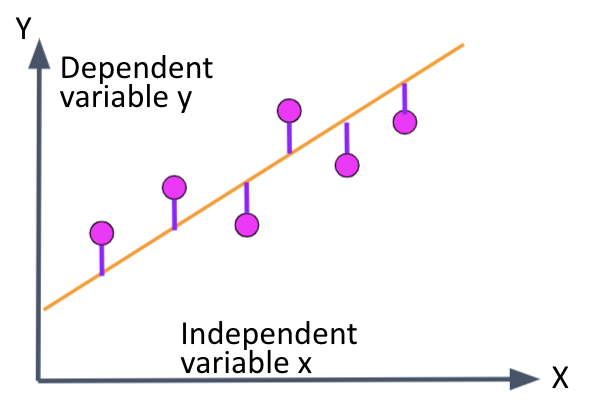

# Ordinary Linear Regression

$\text{Given data }y \text{ satisfying the IID requirement: (Independent and drawn from the Identically same Distribution) } $
$$y = X.w + e $$
$ X \text{ are the independent variables and } y \text{ are the dependent variables and } w \text{ the regression coefficients (or weights), and } e \text{ is the error} $

$\text{Writing this out as an example in } (x, y) \text{ space}$
$$\left\{ 
  \begin{aligned}
    y_1 \\ y_2 \\ . \\y_n
  \end{aligned}
  \right\}=
  \begin{bmatrix} 1 & x_{1}  \\ 1 & x_{2}  \\ 1 & x_{3}  \\ ... \\ 1 & x_{n} \end{bmatrix}
  \begin{equation}
\left\{ 
  \begin{aligned}
    w_0 \\ w_1
  \end{aligned}
  \right\} + e
\end{equation}
$$
$\text{We see we can generate any } y_i \text{ from an } x_i \text{, as follows:}$
$$y_i = w_0 + x_i.w_1 + e$$
$\text{Linear algebra tells us that } X^T.e=0 $
$$y = X.w + e $$
$\text{ so multiplying through by } X^T $
$$ X^T y=X^T Xw  $$

$$ w = (X^T X)^{-1} X^T y $$



# Measure of Error or Loss Function 

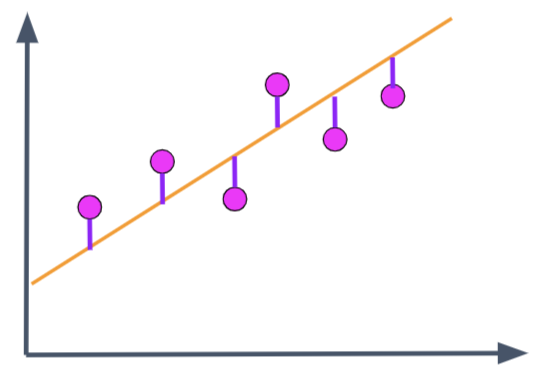

$\text{For large problems, and more generally in machine learning, we define a loss function. In this case we choose a least squares loss function }$
$$ E =\sum |y - X.w|^{2} $$
$\text{where } y \text{ is the actual data and } X.w \text{ is the model prediction} $ 
$\text{ We can find the gradient of } E \text{ with respect to } w $
\begin{equation}
\frac{\partial E}{\partial w} = \sum (y - X.w).X = G
\end{equation}
$\text{ We need to update } w \text{ so that E, the loss function decreases } w $
$$w_n = w_{n-1} - \bigtriangleup G $$
$\text{ We introduce a learning rate } \eta $
$$w_n = w_{n-1} - \eta G $$

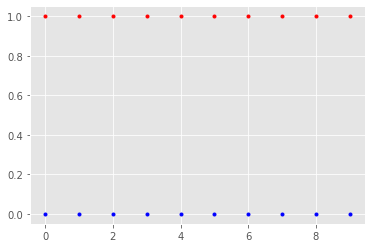

In [5]:
import matplotlib.pyplot as plt
import numpy as np
npoints = 10
x = np.arange(npoints,1)
myones = np.ones(npoints)
x = np.arange(0, npoints)
x = np.vstack((myones, x))      # add a row of 1 to represent the constant term
w = np.array([0,0])
xt = np.transpose(x)
y = np.dot(xt, w)               # equivalent to y = w*x + w0
# later we use the function y = model(w, xy) to achieve the same
plt.plot(x[1], y, 'b.')
y = np.dot(xt, w) + 1
plt.plot(x[1], y, 'r.')


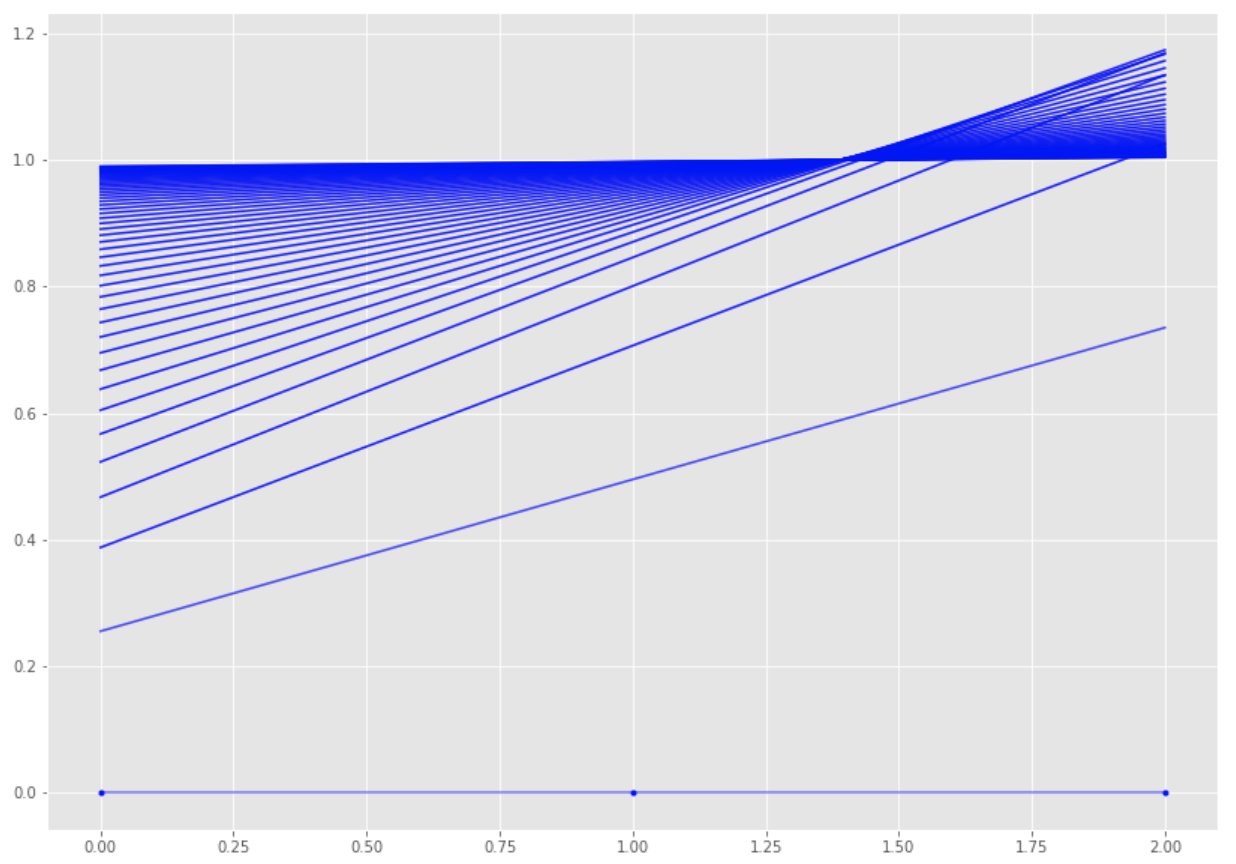

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import time
plt.style.use(['ggplot'])

def gradient_descent(xy, max_iterations, w,
                     obj_func, mse_func, grad_func, extra_param=[],
                     learning_rate=0.05, momentum=0.8):
    (x, y) = xy

    w_history = w
    f_history = obj_func(w, x)
    cost_history = mse_func(w, xy)
    delta_w = np.zeros(w.shape)
    i = 0
    while i < max_iterations:
        delta_w = -learning_rate * grad_func(w, xy)
        w = w + delta_w
        # store the history of w and f
        w_history = np.vstack((w_history, w))
        ypredicted = obj_func(w, x)
        f_history = np.vstack((f_history, ypredicted))
        cost_history = np.vstack((cost_history, mse_func(w, xy)))
        i = i + 1
    return w_history, f_history, cost_history


def grad_mse(w, xy):
    (x, y) = xy
    # Compute the output
    ypredicted = model(w, x)
    diff = y - ypredicted
    grad = -np.dot(x, diff)   # this gives gradient of both w's
    return grad


def mse(w, xy):
    (x, y) = xy
    xt = np.transpose(x)
    ypredicted = np.dot(xt, w)
    loss = np.sum((y - ypredicted)*(y - ypredicted))
    m = 2 * len(y)
    loss = loss / m
    return loss


def model(w, x):
    xt = np.transpose(x)
    ypred = np.dot(xt, w)
    return ypred


In [12]:

ndim = 2
npoints = 3
w = np.array([0, 0])
wt = np.transpose(w)
myones = np.ones(npoints)
x = np.arange(0, npoints)
x = np.vstack((myones, x))
y = model(w, x)
y = y + 1
xy = (x, y)
print(xy)
max_iterations = 100
w_hist, f_hist, c_hist = gradient_descent(
    xy, max_iterations,  w, model, mse, grad_mse, learning_rate=0.1, momentum=0.8)
print(f'W: {w_hist}')
#print(f'function hist: {f_hist}')

(array([[1., 1., 1.],
       [0., 1., 2.]]), array([1., 1., 1.]))
W: [[0.00000000e+00 0.00000000e+00]
 [3.00000000e-01 3.00000000e-01]
 [4.20000000e-01 3.60000000e-01]
 [4.86000000e-01 3.54000000e-01]
 [5.34000000e-01 3.31200000e-01]
 [5.74440000e-01 3.05400000e-01]
 [6.10488000e-01 2.80368000e-01]
 [6.43231200e-01 2.57037600e-01]
 [6.73150560e-01 2.35549440e-01]
 [7.00540560e-01 2.15829552e-01]
 [7.25629526e-01 1.97752608e-01]
 [7.48614886e-01 1.81187446e-01]
 [7.69674186e-01 1.66009257e-01]
 [7.88969153e-01 1.52102373e-01]
 [8.06647696e-01 1.39360440e-01]
 [8.22845255e-01 1.27685912e-01]
 [8.37685905e-01 1.16989379e-01]
 [8.51283320e-01 1.07188918e-01]
 [8.63741648e-01 9.82094632e-02]
 [8.75156315e-01 8.99822371e-02]
 [8.85614749e-01 8.24442241e-02]
 [8.95197057e-01 7.55376873e-02]
 [9.03976634e-01 6.92097265e-02]
 [9.12020726e-01 6.34118731e-02]
 [9.19390946e-01 5.80997188e-02]
 [9.26143747e-01 5.32325756e-02]
 [9.32330850e-01 4.87731638e-02]
 [9.37999646e-01 4.46873269e-02]
 [9.431

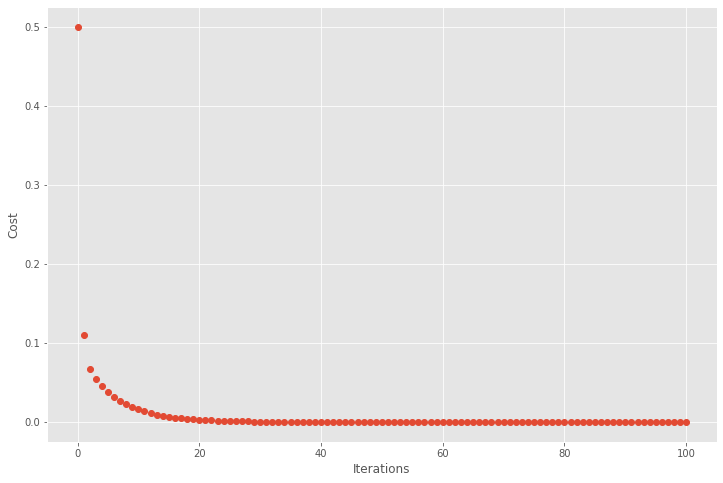

In [8]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.set_ylabel('Cost')
ax.set_xlabel('Iterations')
iterations = len(c_hist)
_ = ax.plot(range(iterations), c_hist, 'o')
fig.show()

In [10]:
def plot_GD(xy, w, max_iterations,learning_rate,ax,ax1=None):
  x,y = xy
  y = model(w,x)
  _ = ax.plot(x[1],y,'b.')
  
  tr = 0.5
  for i in range(max_iterations):
    pred_prev = xt.dot(wt)
    w_hist, f_hist, c_hist = gradient_descent( xy, max_iterations-1, w, model, mse, grad_mse, [], learning_rate=0.05, momentum=0.8)
    pred = xt.dot(wt)
    if ((i % 2 == 0) ):
      ypred = f_hist[i]
      _ = ax.plot(x[1],ypred, 'b-',alpha=tr)
      if tr < 0.8:
        tr = tr+0.2   
    if not ax1== None:
      _ = ax1.plot(range(n_iter),c_hist,'o')  

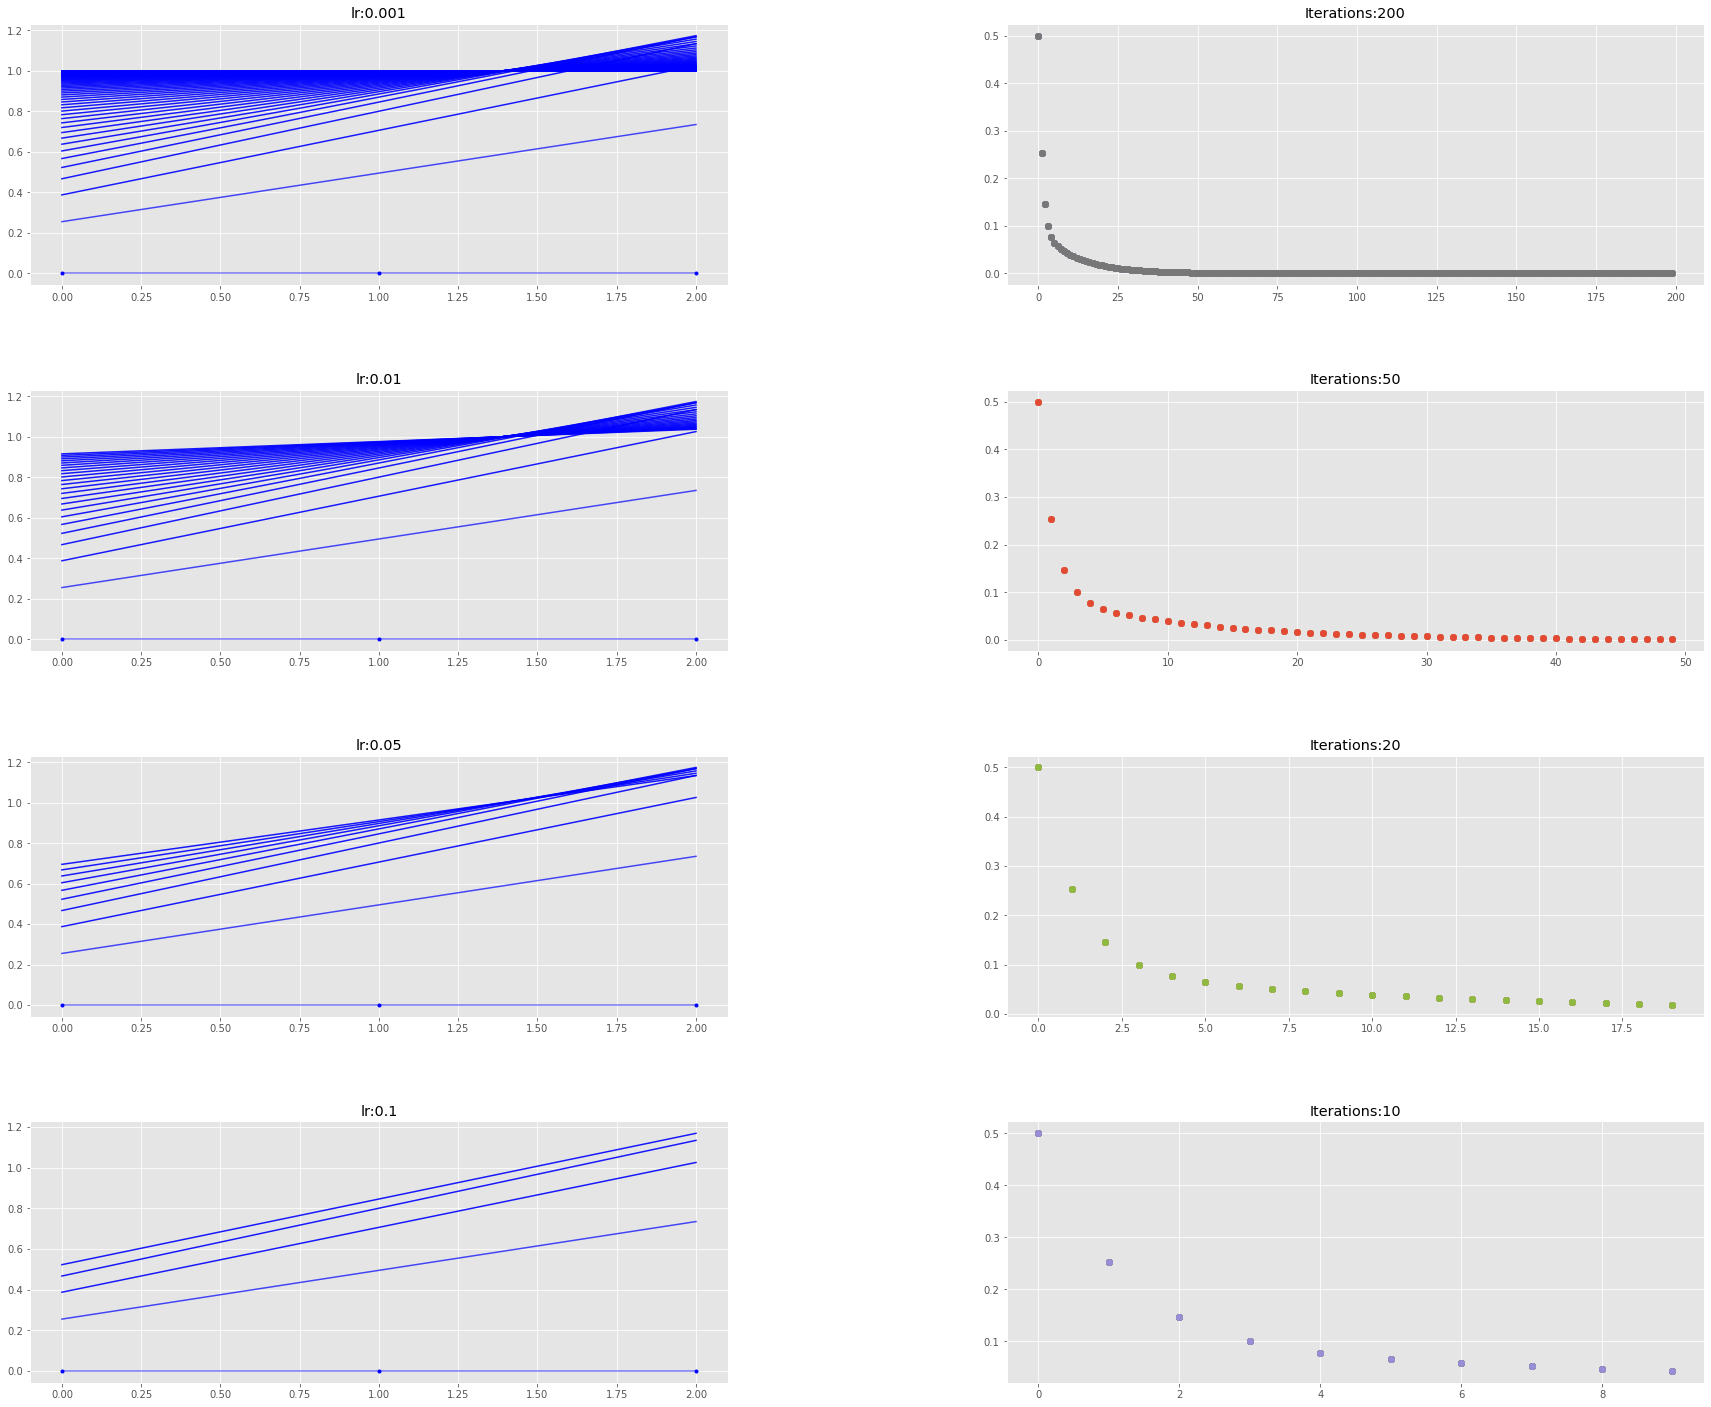

In [11]:
fig = plt.figure(figsize=(30,25))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
w = np.array([0,0])
it_lr =[(200,0.001),(50,0.01),(20,0.05),(10,0.1)]
count =0
for n_iter, lr in it_lr:
    count += 1
    ax = fig.add_subplot(4, 2, count)
    count += 1
    ax1 = fig.add_subplot(4,2,count)
    
    ax.set_title("lr:{}".format(lr))
    ax1.set_title("Iterations:{}".format(n_iter))
    plot_GD(xy, w, n_iter, lr, ax, ax1)
    

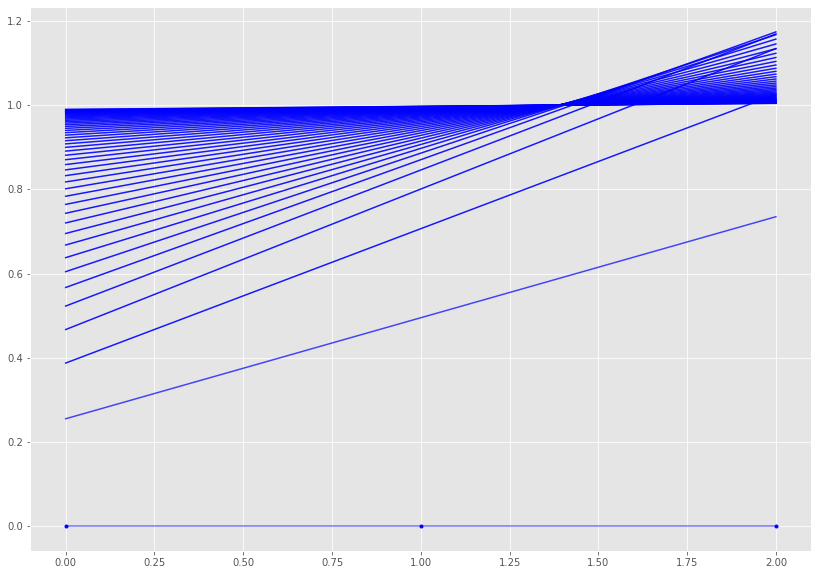

In [59]:
_,ax = plt.subplots(figsize=(14,10))
plot_GD(xy, w, 100,0.1,ax)


# Stochastic Gradient Descent

In [79]:
def plot_SGD(xy, w, max_iterations,learning_rate,ax,ax1=None):
  x,y = xy
  y = model(w,x)
  _ = ax.plot(x[1],y,'b.')
  
  tr = 0.5
  for i in range(max_iterations):
    pred_prev = xt.dot(wt)
    w_hist, f_hist, c_hist = gradient_descent( xy, max_iterations-1, w, model, mse, grad_mse, [], learning_rate=0.05, momentum=0.8)
    pred = xt.dot(wt)
    if ((i % 2 == 0) ):
      ypred = f_hist[i]
      _ = ax.plot(x[1],ypred, 'b-',alpha=tr)
      if tr < 0.8:
        tr = tr+0.2   
    if not ax1== None:
      _ = ax1.plot(range(n_iter),c_hist,'o') 
ndim = 2
npoints = 100
w = np.array([0, 0])

myones = np.ones(npoints)
x = np.arange(0, npoints)
x = np.vstack((myones, x))
y = model(w, x)
y = y + 1
max_iterations = 10


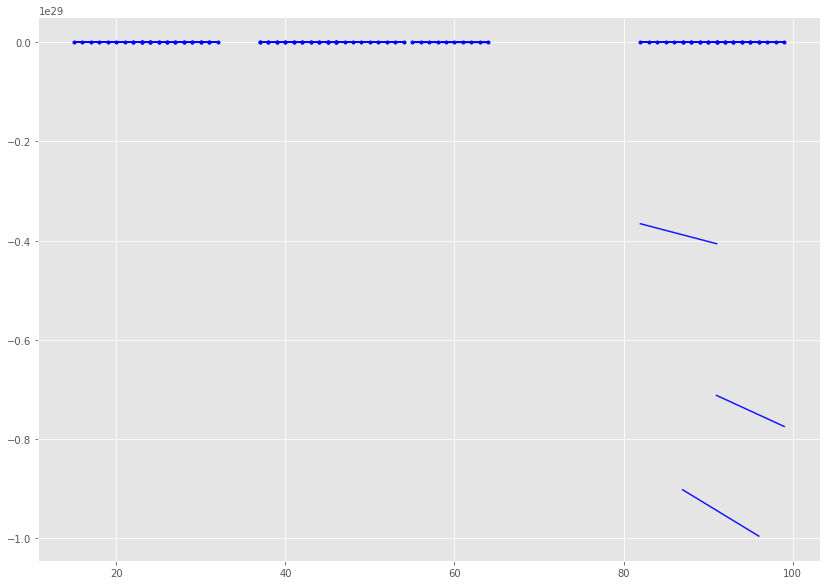

In [80]:



def get_slice(x, y, n):
    start = np.random.randint(0, npoints)
    return x[:,start:start+n], y[start:start+n]

_,ax = plt.subplots(figsize=(14,10))
for i in range(10):
    x_slice, y_slice = get_slice(x, y, 10)
    xy = (x_slice,y_slice)
    #print(xy)
    plot_GD(xy, w, max_iterations,0.1,ax)

   
